In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt


In [2]:
years = list(range(1950, 2021))
renewable_energy = [4250, 4492, 4733, 4975, 5217, 5458, 5700, 5942, 6183, 6425, 6667, 6908, 7150, 7392, 7633, 7875, 8117, 8358, 8600, 8842, 9083, 9425, 9767, 10108, 10450, 10792, 11133, 11475, 11817, 12158, 12500, 12942, 13383, 13825, 14267, 14708, 15150, 15592, 16033, 16475, 16917, 17917, 18917, 19917, 20917, 21917, 22917, 23917, 24917, 25917, 26917, 28917, 30917, 32917, 34917, 36917, 38917, 40917, 42917, 44917, 46917, 51917, 56917, 61917, 66917, 71917, 76917, 81917, 86917, 91917, 96917]

data = {'Year': years, 'Renewable Energy (MW)': renewable_energy}
data = pd.DataFrame(data)

In [3]:
data

,Year,Renewable Energy (MW)
0,1950,4250
1,1951,4492
2,1952,4733
3,1953,4975
4,1954,5217
...,...,...
66,2016,76917
67,2017,81917
68,2018,86917
69,2019,91917


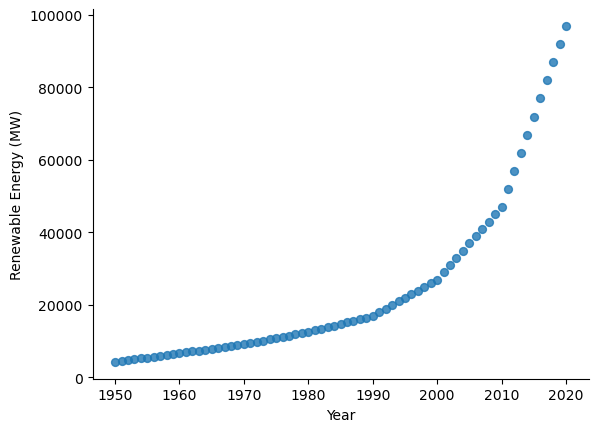

In [4]:
data.plot(kind='scatter', x='Year', y='Renewable Energy (MW)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
# Split the data into training and test sets
train_data = data[data['Year'] <= 2015]
test_data = data[data['Year'] > 2015]


In [6]:
# Train an ARIMA model on the training data
model_arima = ARIMA(train_data['Renewable Energy (MW)'], order=(5, 1, 0))
model_arima_fit = model_arima.fit()

/Users/anuragverma/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [7]:
# Make predictions on the test data
predictions_arima = model_arima_fit.predict(start=len(train_data), end=len(data) - 1, dynamic=False)

In [8]:
predictions_arima

66    76782.288614
67    81514.221512
68    86114.091788
69    90583.125327
70    94922.468084
Name: predicted_mean, dtype: float64

In [9]:
# Train a SARIMA model on the training data
model_sarima = SARIMAX(train_data['Renewable Energy (MW)'], order=(5, 1, 0), seasonal_order=(1, 0, 1, 12))
model_sarima_fit = model_sarima.fit(disp=0)


/Users/anuragverma/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/anuragverma/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/anuragverma/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [10]:
# Make predictions on the test data
predictions_sarima = model_sarima_fit.predict(start=len(train_data), end=len(data) - 1, dynamic=False)

In [11]:
predictions_sarima

66    76865.726031
67    81759.570479
68    86604.601350
69    91392.903504
70    96133.323550
Name: predicted_mean, dtype: float64

In [12]:
predictions_arima.mean()

85983.23906499511

In [13]:
predictions_sarima.mean()

86551.22498283928

In [14]:
test_data.mean()[1]

86917.0